# (2) Use the KDE to estimate pdf of given samples using
## 𝐾~𝑁𝑜𝑟𝑚𝑎𝑙)
## h is bandwidth, n is number samples.

# Let (x1, x2, …, xn) be a univariate independent and identically distributed sample drawn from some distribution with an unknown density ƒ. We are interested in estimating the shape of this function ƒ. Its kernel density estimator is

<img src="w.svg">

#  where K is the kernel — a non-negative function — and h > 0 is a smoothing parameter called the bandwidth.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
x1= np.random.normal(5,1,100)
x2=np.random.normal(-5,1,100)
data=x1
data= np.append(data,x2)
#data=0.6*x1+0.4*x2

print(np.shape(data))
N=200
print(data)

(200,)
[ 6.70793277  3.39123434  5.75597794  6.41235438  4.13309327  3.60921396
  6.44119795  3.51931222  4.58641956  3.49886822  5.10721381  4.9007897
  2.86773658  4.03787266  5.46414918  6.04800139  4.71004848  4.8939748
  5.14476602  3.44393929  5.40690874  3.55034378  4.58880445  5.68432279
  4.25001272  4.63932137  4.09580292  7.60637766  4.12293187  5.49417785
  3.49108604  5.69770092  5.65799855  5.58803922  4.7432443   5.76950349
  5.32783634  6.29225183  4.44875187  5.88716486  3.92719868  5.06317983
  5.79940763  4.97585489  4.70612477  4.75709942  5.3717996   6.80470725
  3.80464425  6.6337986   6.87928132  3.63371795  3.74526259  5.23617479
  5.07318782  5.30368691  5.27343411  4.1865926   6.28101692  5.30130561
  5.07405752  4.4109766   4.91363305  4.2991826   5.57463029  4.76660427
  4.7131364   4.23510905  5.53241746  6.27797884  5.63807232  6.35013401
  5.42765931  4.94178634  5.25354028  6.50066601  6.68517735  3.66495855
  4.31785666  5.46195617  5.50049916  3.346481

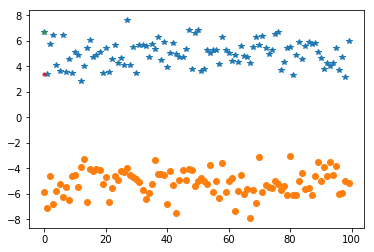

In [30]:
plt.plot(x1,'*')
plt.plot(x2,'o')
plt.plot(data[0],'.')
plt.plot(data[1],'.')
plt.show()

In [106]:
def phi(x):
 return (np.exp(-0.5*(x**2))/(np.sqrt(2*np.pi)))  # Normal Density-> Mean =0, var=1
           
def tpdf(x):
 return (phi(x-5)*0.5) +  (phi(x+5)*0.5) # True Density-> Mean 10,-10, var=1



def kernel(x,h):
    return np.mean(phi((x-data)/h)/h) #  Kernel Density
    
def kpdf(x,h):
    temp=[]
    for i in range(len(x)):
        temp.append(kernel(x[i],h))
        
    return temp   



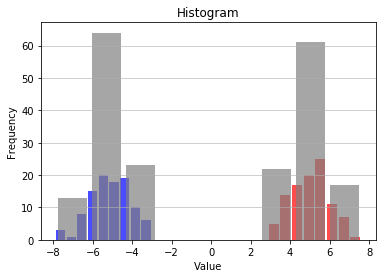

In [107]:
n, bins, patches = plt.hist(x=x1, bins='auto', color='red',alpha=0.7, rwidth=0.85)
n, bins, patches = plt.hist(x=x2, bins='auto', color='blue',alpha=0.7, rwidth=0.85)
n, bins, patches = plt.hist(x=data, bins='auto', color='grey',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
#plt.bar(x1,phi(x1))
#plt.bar(phi(x2),'g')
#plt.plot(phi(x))
plt.show()

Text(0.5,1,'Histogram')

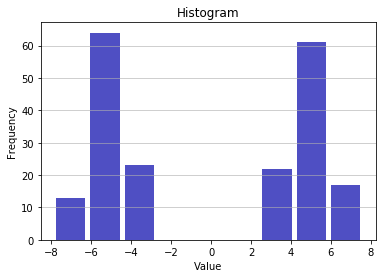

In [108]:
n, bins, patches = plt.hist(x=data, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

In [139]:
x = np.linspace(-25,+25,100)
x
h=0.3
print(len(kpdf(x,h)))
print(len(tpdf(x)))

100
100


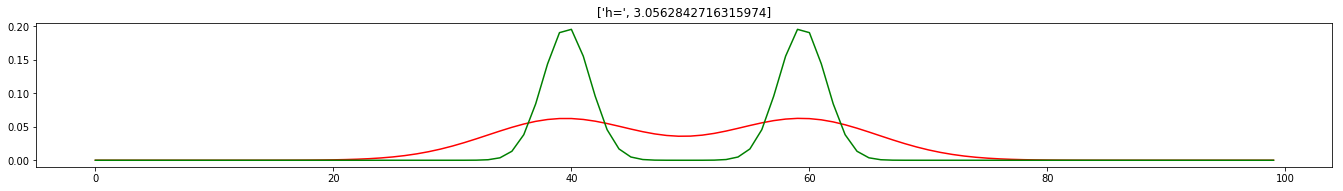

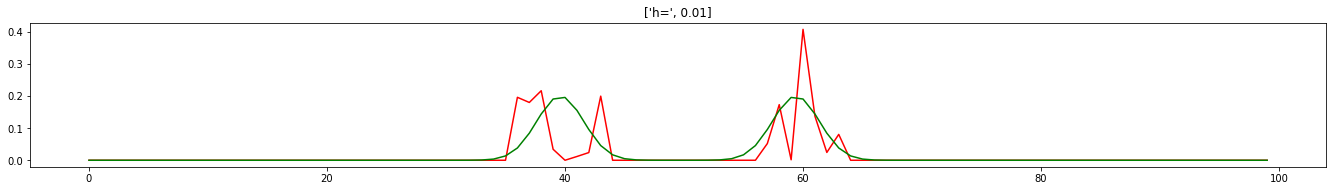

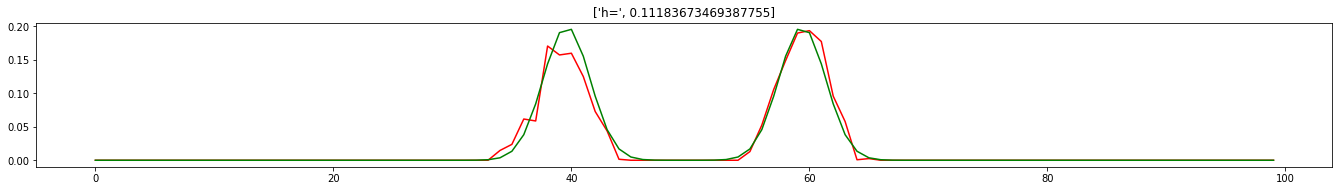

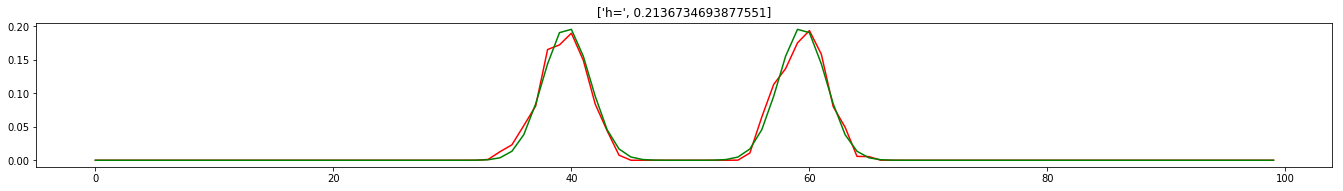

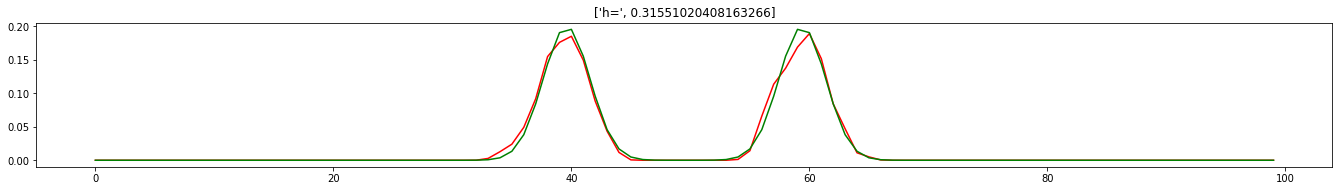

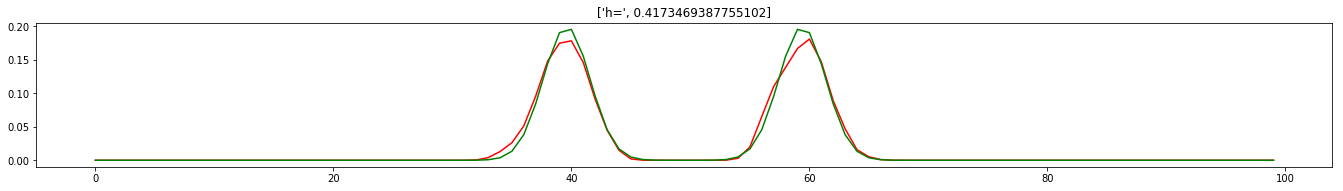

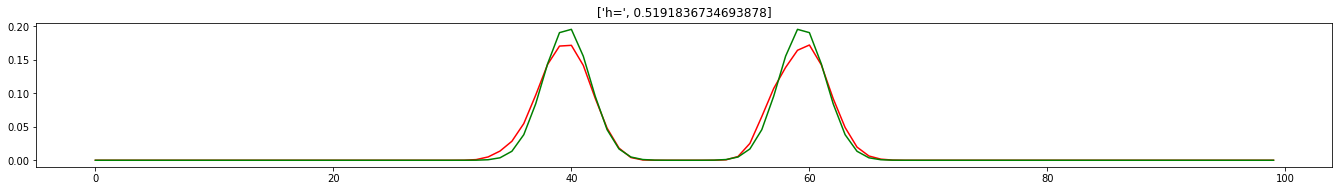

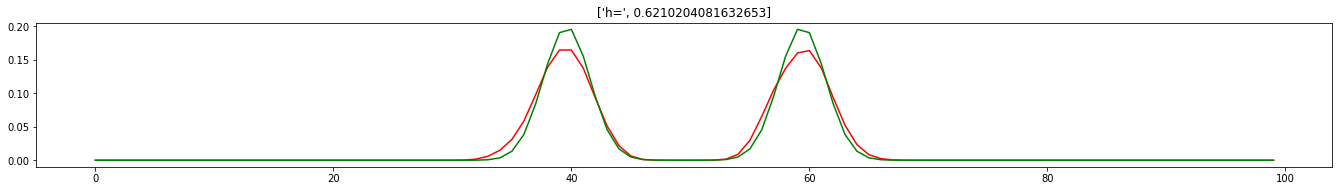

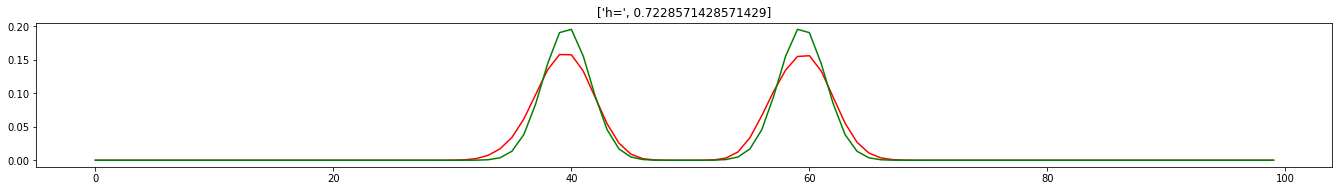

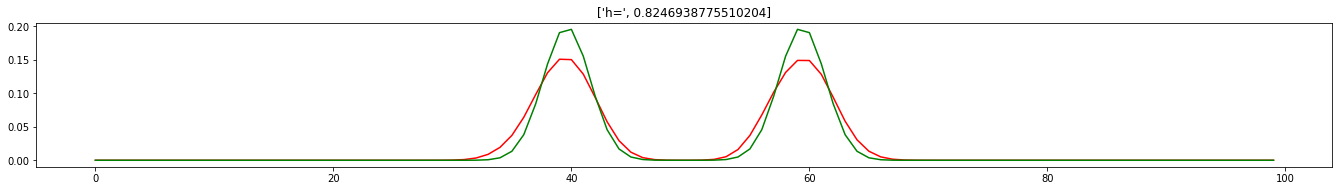

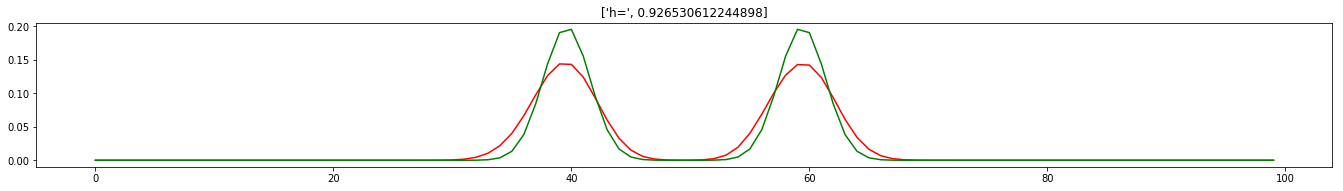

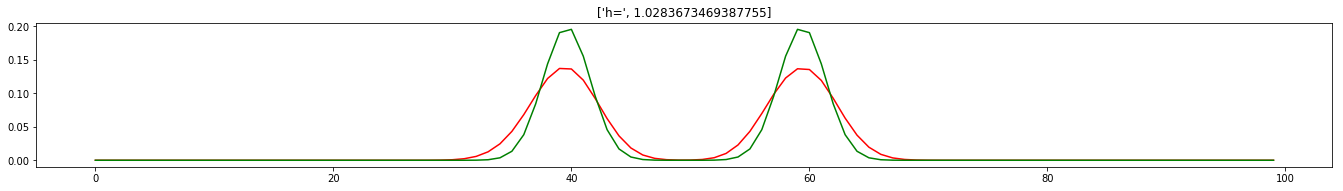

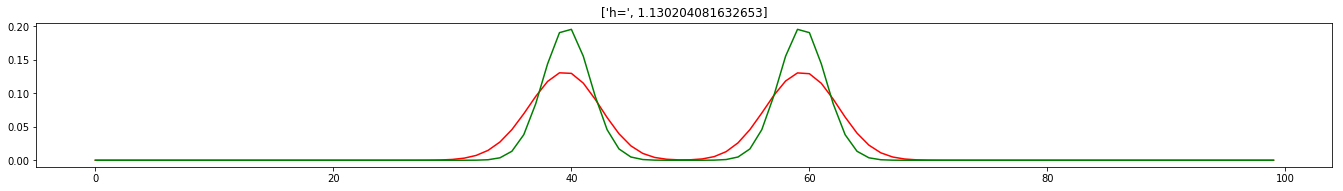

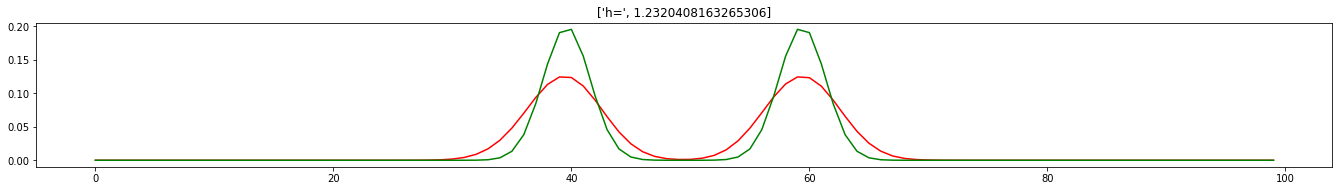

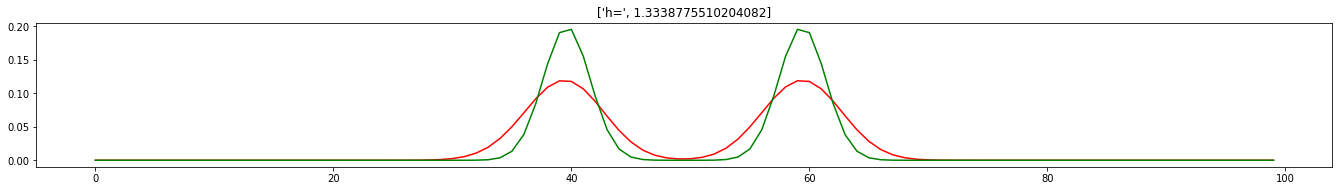

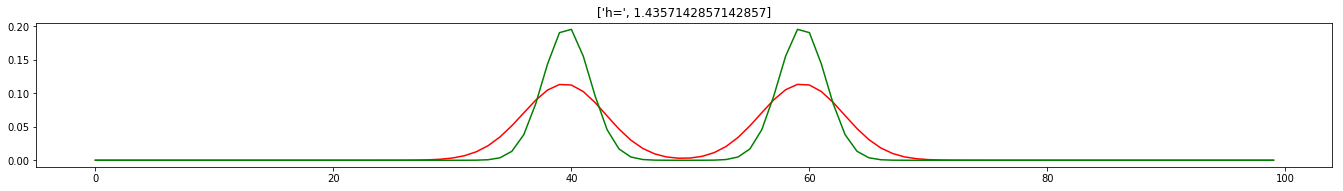

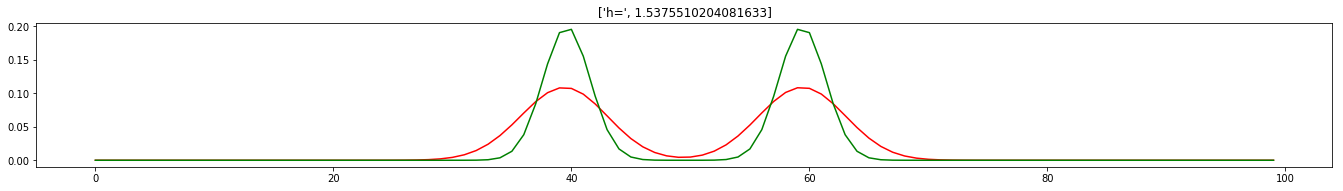

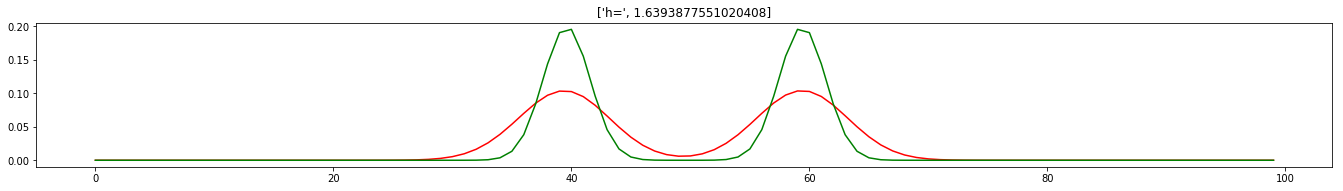

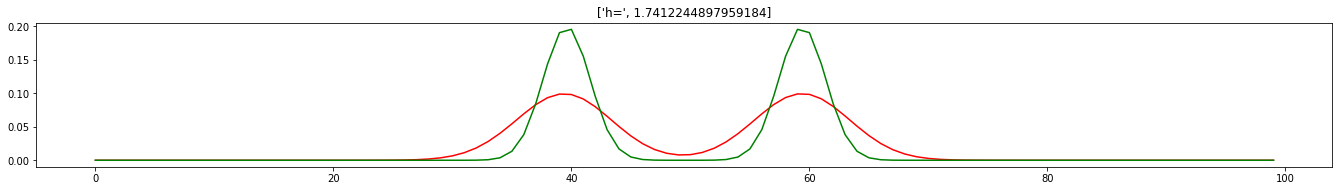

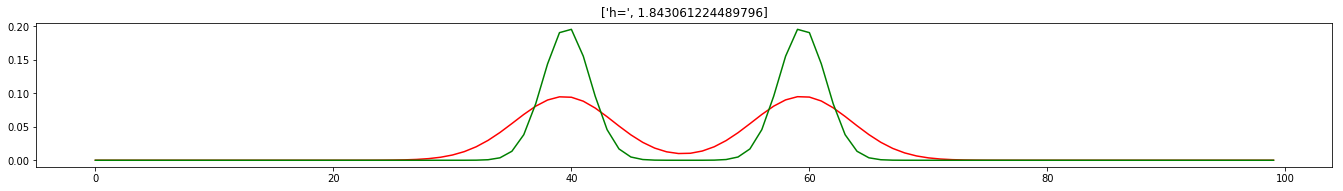

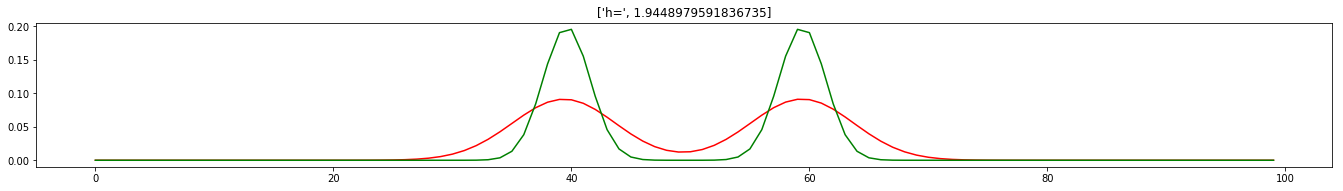

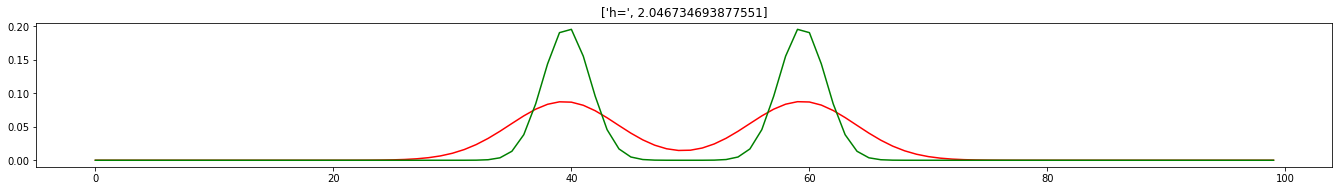

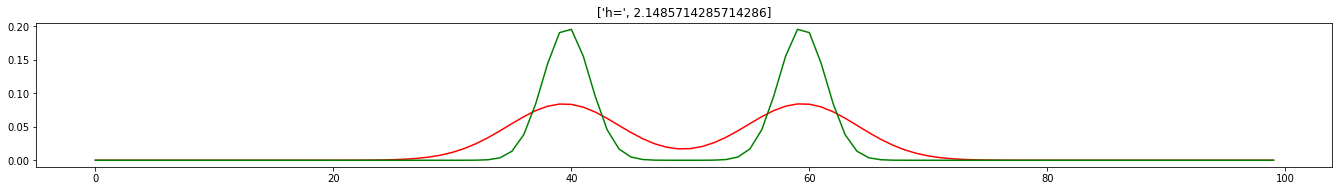

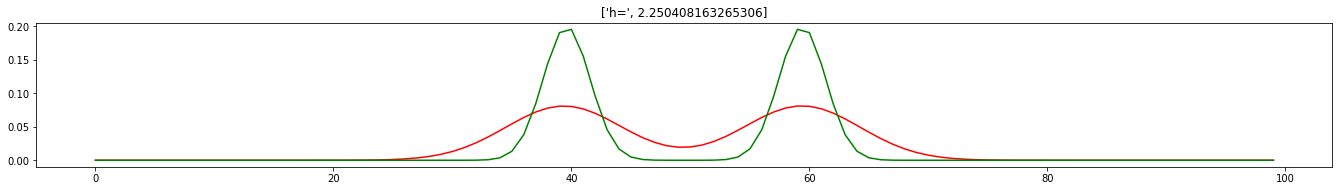

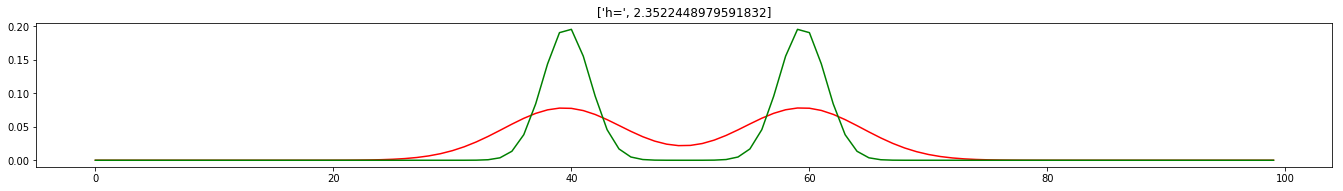

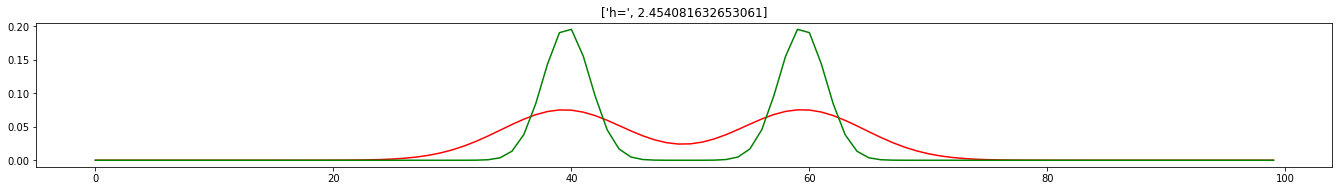

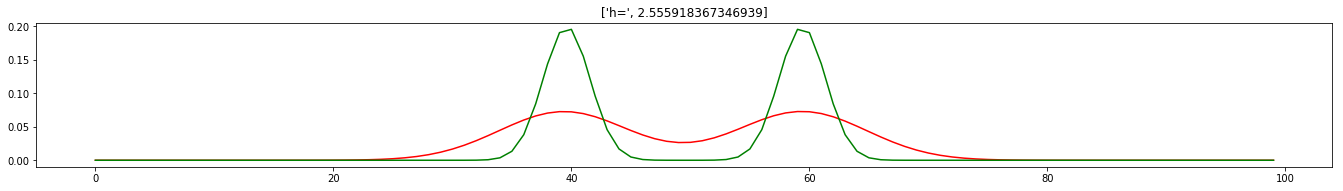

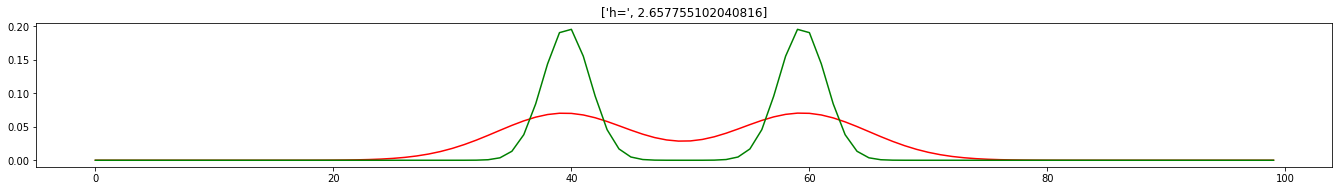

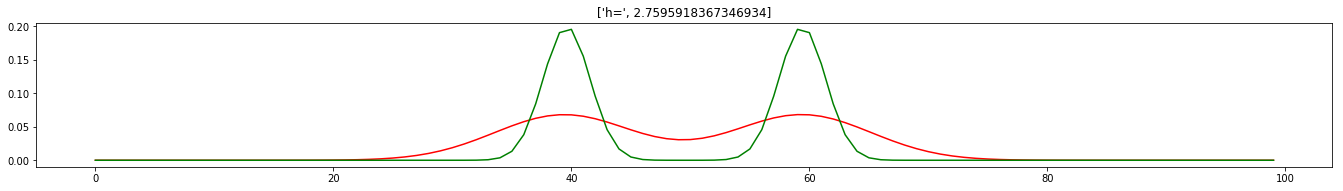

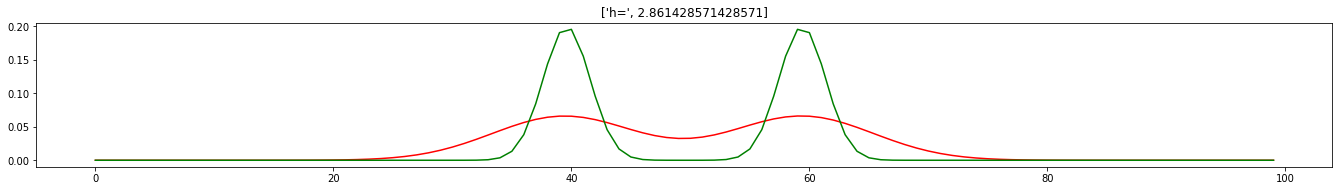

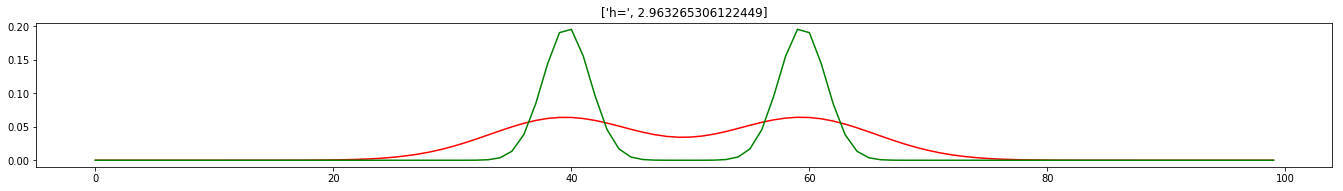

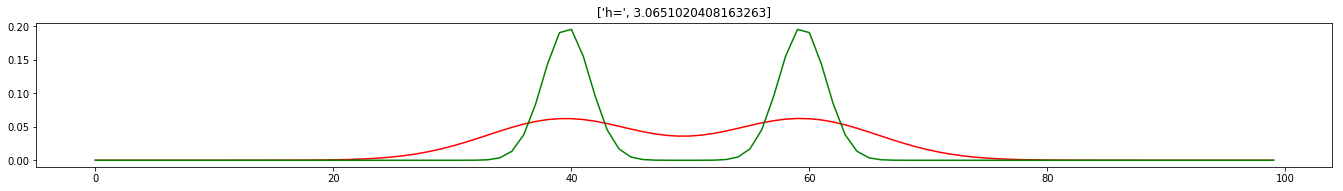

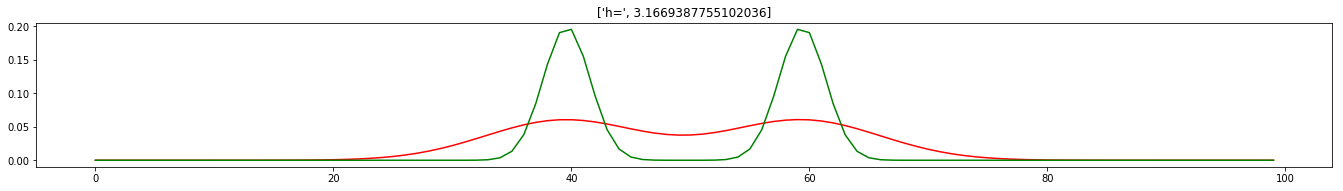

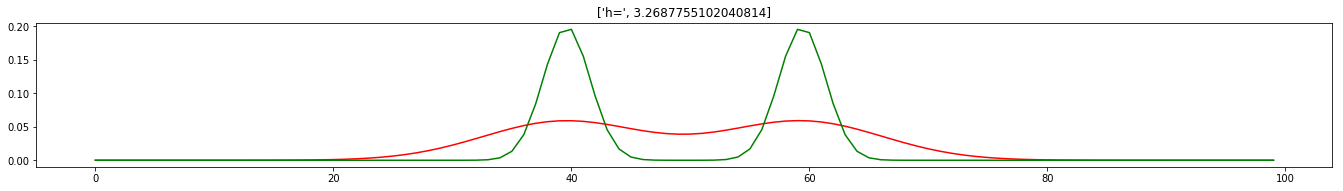

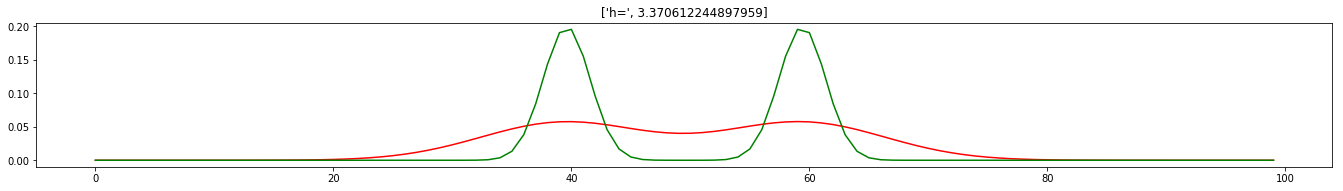

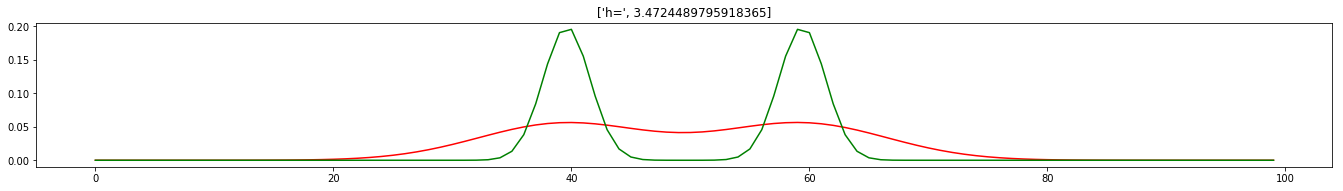

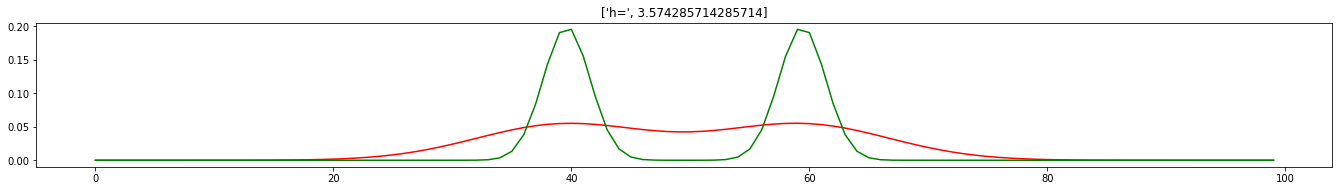

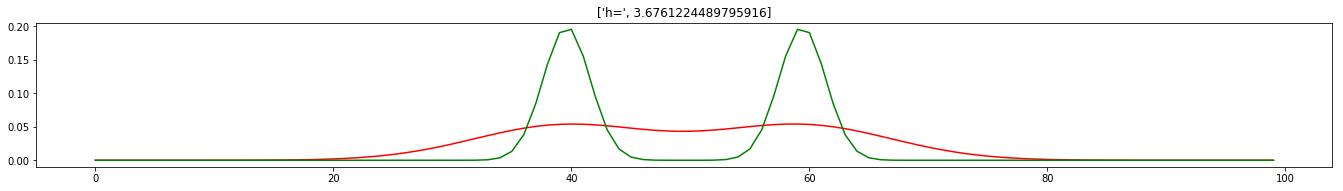

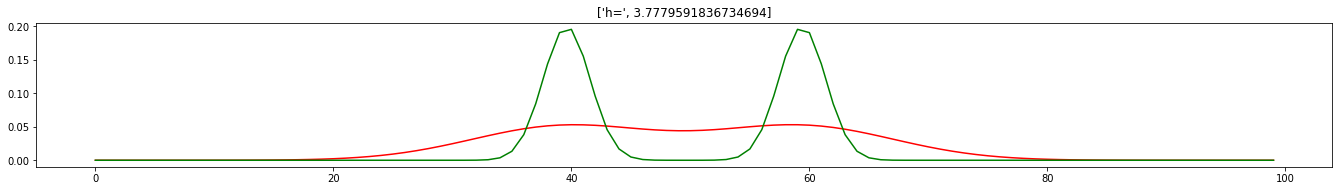

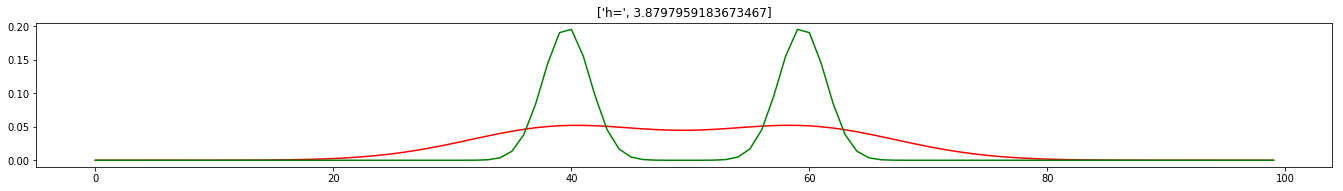

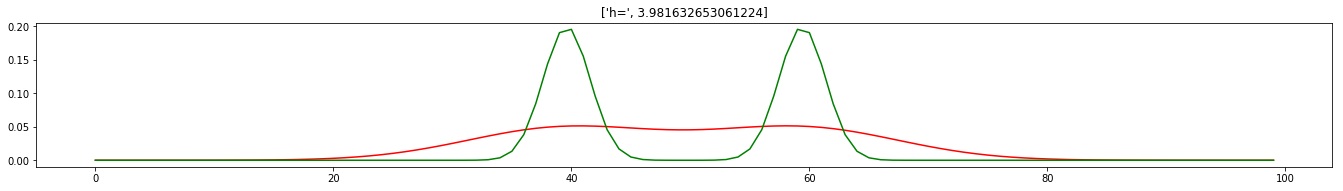

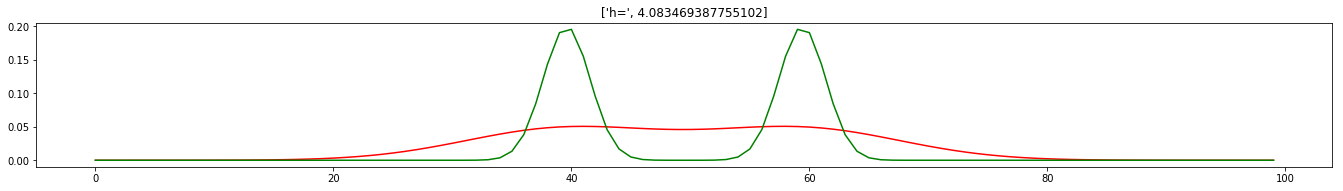

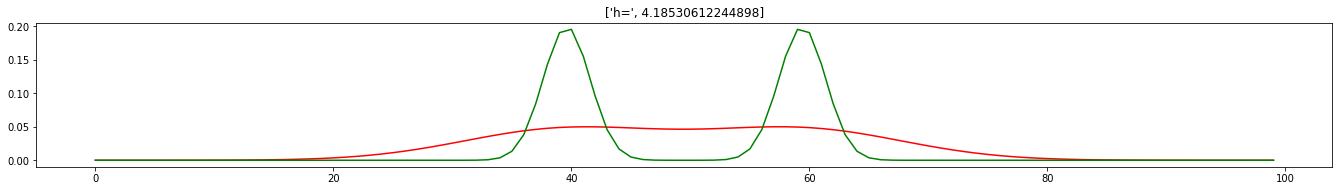

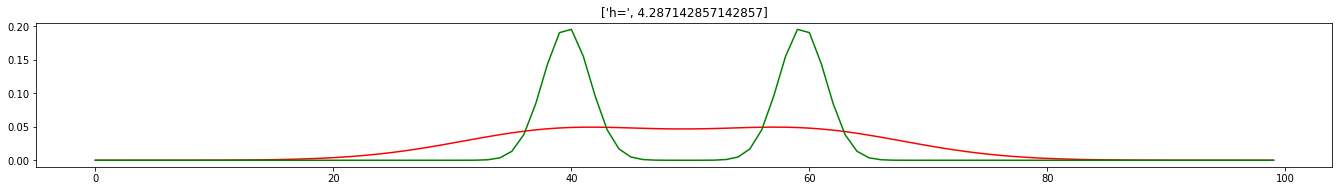

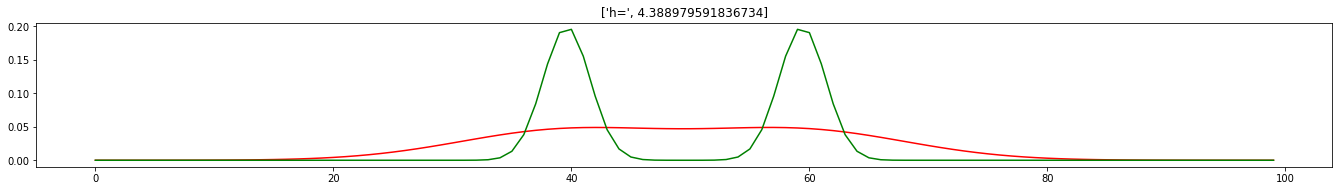

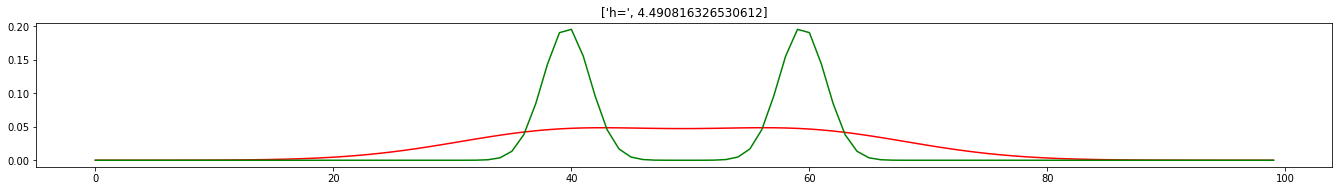

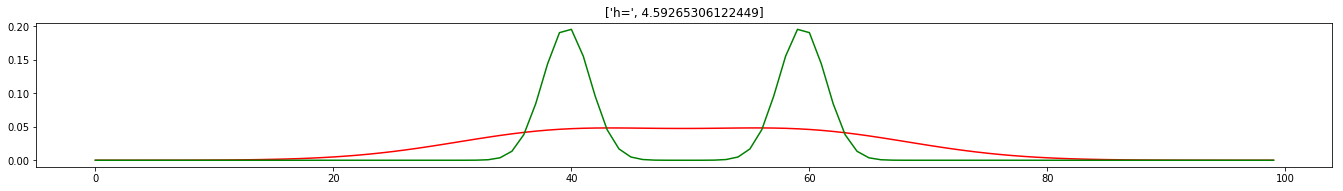

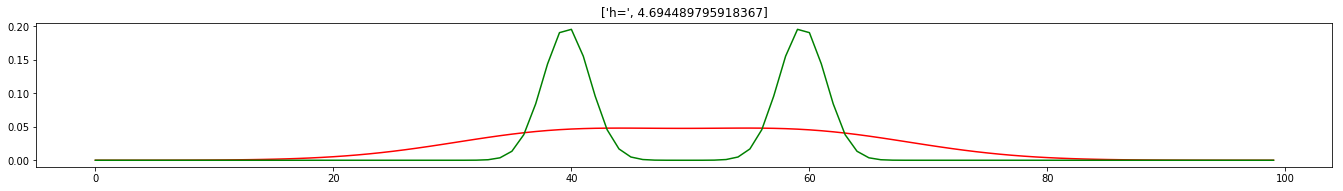

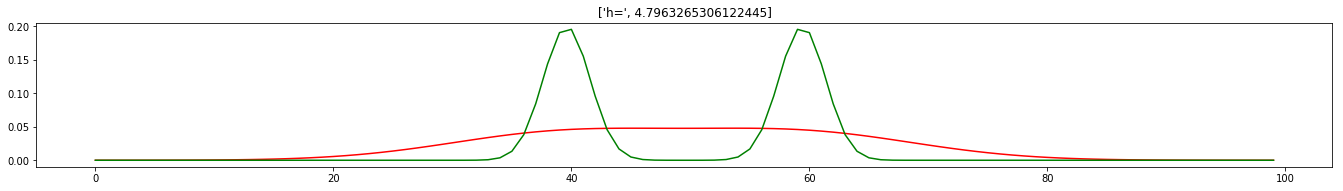

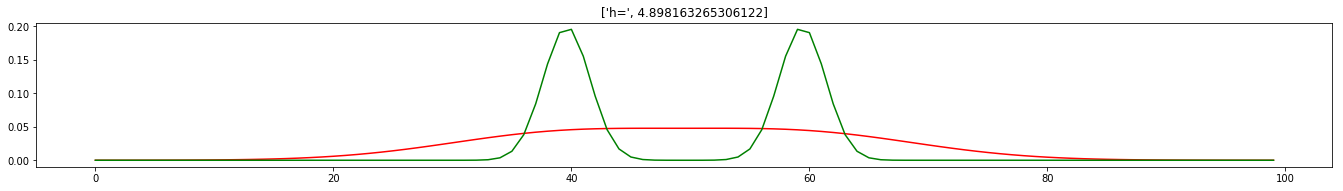

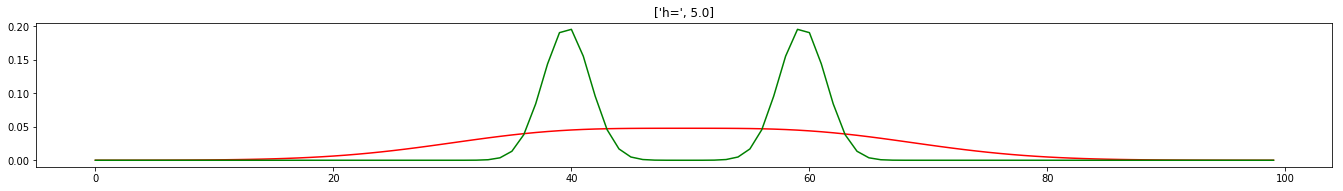

In [138]:
# Kernel - Bandwidth estimated by Silverman's Rule of Thumb
h=np.power((4/3*N),1/5)
ax1 = plt.axes([0, 0, 3, 0.5])
plt.plot(kpdf(x,h),'r') # Kernel Density Estimated
plt.plot(tpdf(x),'g') # True density
plt.title(['h=',h])
plt.show()
    
h=np.linspace(0.01,5,num=50)
for i in range(len(h)):
 ax1 = plt.axes([0, 0, 3, 0.5])
 plt.plot(kpdf(x,h[i]),'r') # Kernel Density Estimated
 plt.plot(tpdf(x),'g') # True density
 plt.title(['h=',h[i]])
 plt.show()




# So it can be seen that at h=0.3155 , the estimation is very good
